# Vectors and Matrices: The Building Blocks of AI

> *"In mathematics, you don't understand things. You just get used to them."* - John von Neumann

Welcome to the foundational world of **Linear Algebra** - the mathematical language that powers every AI system! This notebook will transform abstract vector and matrix concepts into visual, intuitive understanding.

## What You'll Learn

- **Vector Operations**: Addition, scalar multiplication, and geometric interpretation
- **Matrix Fundamentals**: Understanding matrices as linear transformations
- **Visual Demonstrations**: See math in action with interactive plots
- **AI Connections**: How vectors and matrices power neural networks

---

## Import Essential Libraries

Let's start by importing the mathematical powerhouses we'll need:

In [14]:
# Core mathematical libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Interactive widgets
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed

# Animation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Set up plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Configure matplotlib for better display
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

print("Libraries loaded successfully!")
print(f"NumPy version: {np.__version__}")

Libraries loaded successfully!
NumPy version: 2.3.3


---

# Chapter 1: Understanding Vectors

## What is a Vector?

A **vector** is more than just a list of numbers - it's a mathematical object that has both **magnitude** (length) and **direction**. In AI, vectors represent:

- **Data points** (features of an image, text, etc.)
- **Model parameters** (weights and biases)
- **Embeddings** (word vectors, sentence representations)

### Mathematical Definition

A vector $\mathbf{v}$ in $\mathbb{R}^n$ is an ordered list of $n$ real numbers:

$$\mathbf{v} = \begin{bmatrix} v_1 \\ v_2 \\ \vdots \\ v_n \end{bmatrix}$$

Let's create and visualize some vectors!

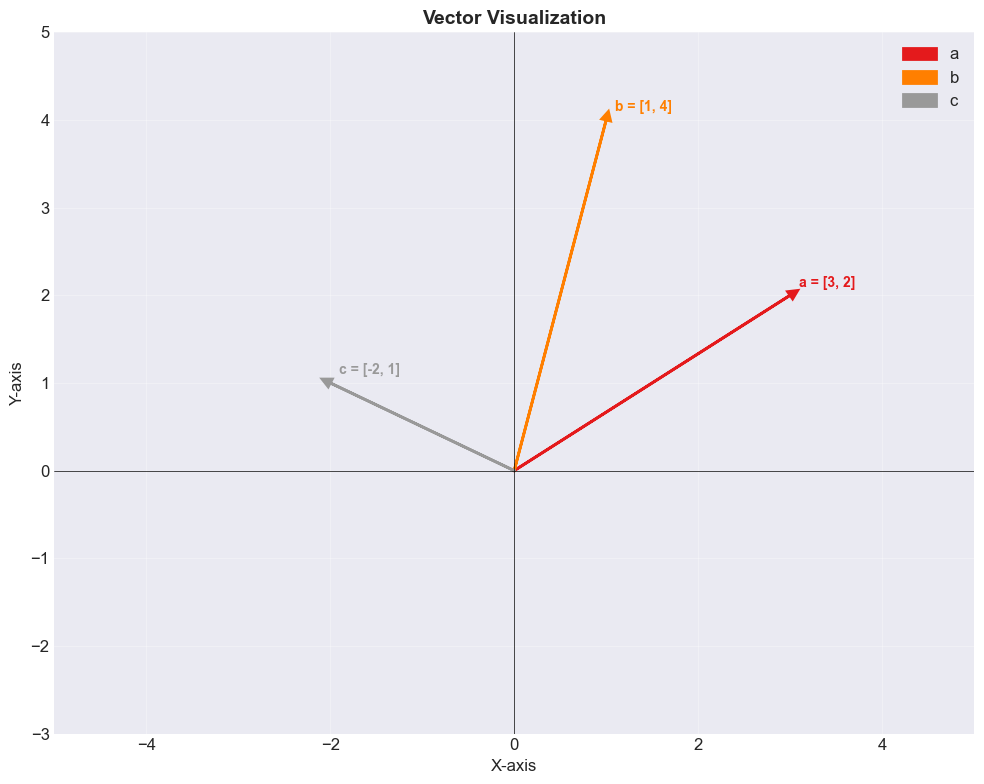

Vector Properties:
Vector a: [3 2], Magnitude: 3.61
Vector b: [1 4], Magnitude: 4.12
Vector c: [-2  1], Magnitude: 2.24


In [15]:
# Create some example vectors
vector_a = np.array([3, 2])
vector_b = np.array([1, 4])
vector_c = np.array([-2, 1])

def plot_vectors(vectors, labels, colors=None, figsize=(10, 8)):
    """
    Plot multiple vectors starting from the origin
    """
    if colors is None:
        colors = plt.cm.Set1(np.linspace(0, 1, len(vectors)))
    
    fig, ax = plt.subplots(figsize=figsize)
    
    for i, (vector, label, color) in enumerate(zip(vectors, labels, colors)):
        # Plot vector as arrow
        ax.arrow(0, 0, vector[0], vector[1], 
                head_width=0.1, head_length=0.1, 
                fc=color, ec=color, linewidth=2, label=label)
        
        # Add vector coordinates as text
        ax.text(vector[0] + 0.1, vector[1] + 0.1, 
               f'{label} = [{vector[0]}, {vector[1]}]', 
               fontsize=10, color=color, weight='bold')
    
    # Beautify the plot
    ax.set_xlim(-5, 5)
    ax.set_ylim(-3, 5)
    ax.grid(True, alpha=0.3)
    ax.axhline(y=0, color='k', linewidth=0.5)
    ax.axvline(x=0, color='k', linewidth=0.5)
    ax.set_xlabel('X-axis', fontsize=12)
    ax.set_ylabel('Y-axis', fontsize=12)
    ax.set_title('Vector Visualization', fontsize=14, weight='bold')
    ax.legend()
    
    plt.tight_layout()
    return fig, ax

# Visualize our vectors
vectors = [vector_a, vector_b, vector_c]
labels = ['a', 'b', 'c']
plot_vectors(vectors, labels)
plt.show()

print("Vector Properties:")
for vector, label in zip(vectors, labels):
    magnitude = np.linalg.norm(vector)
    print(f"Vector {label}: {vector}, Magnitude: {magnitude:.2f}")

## Vector Operations

### 1. Vector Addition

Vector addition follows the **parallelogram rule**. For vectors $\mathbf{a}$ and $\mathbf{b}$:

$$\mathbf{a} + \mathbf{b} = \begin{bmatrix} a_1 + b_1 \\ a_2 + b_2 \end{bmatrix}$$

**Geometric Interpretation**: Place the tail of the second vector at the head of the first vector.

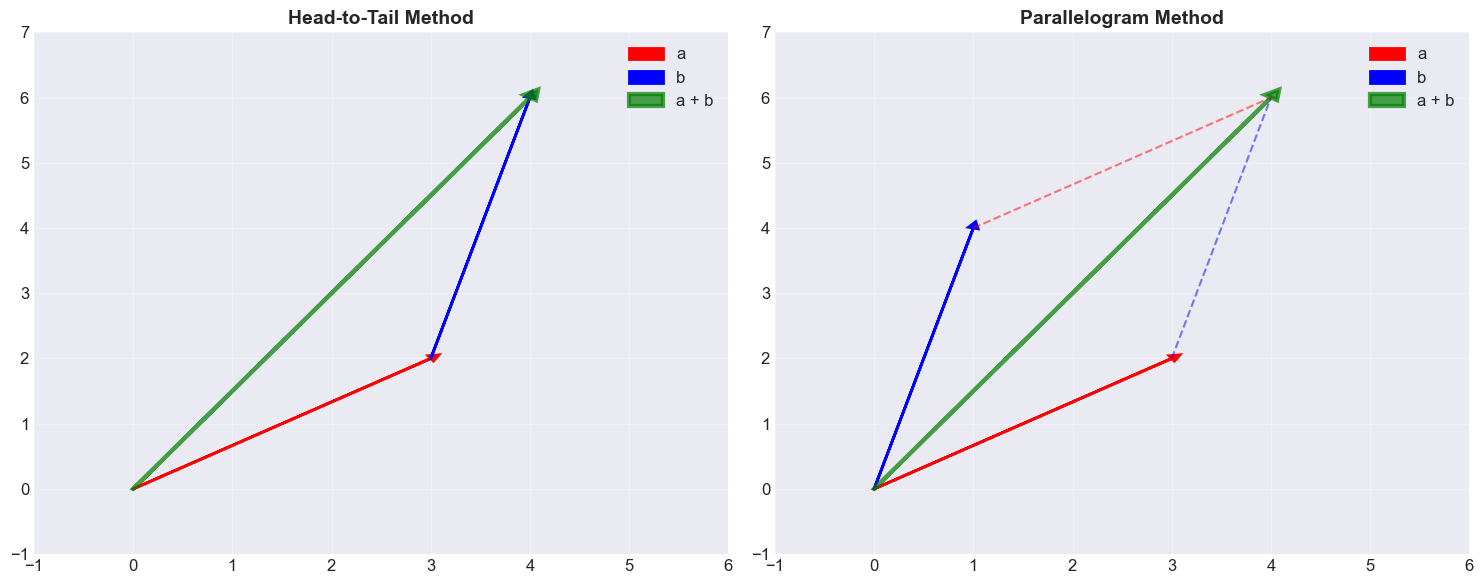

+ Vector Addition:
 a= [3 2]
 b= [1 4]
 a + b= [4 6]
Verification: [3 2] + [1 4] = [4 6]


In [16]:
def visualize_vector_addition(vec_a, vec_b):
    """
    Visualize vector addition using the parallelogram method
    """
    vec_sum = vec_a + vec_b
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Method 1: Head-to-tail addition
    ax1.arrow(0, 0, vec_a[0], vec_a[1], head_width=0.1, head_length=0.1, 
             fc='red', ec='red', linewidth=2, label='a')
    ax1.arrow(vec_a[0], vec_a[1], vec_b[0], vec_b[1], head_width=0.1, head_length=0.1, 
             fc='blue', ec='blue', linewidth=2, label='b')
    ax1.arrow(0, 0, vec_sum[0], vec_sum[1], head_width=0.15, head_length=0.15, 
             fc='green', ec='green', linewidth=3, label='a + b', alpha=0.7)
    
    ax1.set_title('Head-to-Tail Method', fontsize=14, weight='bold')
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    ax1.set_xlim(-1, 6)
    ax1.set_ylim(-1, 7)
    
    # Method 2: Parallelogram method
    ax2.arrow(0, 0, vec_a[0], vec_a[1], head_width=0.1, head_length=0.1, 
             fc='red', ec='red', linewidth=2, label='a')
    ax2.arrow(0, 0, vec_b[0], vec_b[1], head_width=0.1, head_length=0.1, 
             fc='blue', ec='blue', linewidth=2, label='b')
    ax2.arrow(0, 0, vec_sum[0], vec_sum[1], head_width=0.15, head_length=0.15, 
             fc='green', ec='green', linewidth=3, label='a + b', alpha=0.7)
    
    # Draw parallelogram
    ax2.plot([vec_a[0], vec_sum[0]], [vec_a[1], vec_sum[1]], 'b--', alpha=0.5)
    ax2.plot([vec_b[0], vec_sum[0]], [vec_b[1], vec_sum[1]], 'r--', alpha=0.5)
    
    ax2.set_title('Parallelogram Method', fontsize=14, weight='bold')
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    ax2.set_xlim(-1, 6)
    ax2.set_ylim(-1, 7)
    
    plt.tight_layout()
    return vec_sum

# Demonstrate vector addition
result = visualize_vector_addition(vector_a, vector_b)
plt.show()

print(f"+ Vector Addition:")
print(f" a= {vector_a}")
print(f" b= {vector_b}")
print(f" a + b= {result}")
print(f"Verification: {vector_a} + {vector_b} = {vector_a + vector_b}")

### 2. Scalar Multiplication

Multiplying a vector by a scalar $c$ scales its magnitude:

$$c \cdot \mathbf{v} = \begin{bmatrix} c \cdot v_1 \\ c \cdot v_2 \end{bmatrix}$$

- If $c > 1$: vector becomes longer
- If $0 < c < 1$: vector becomes shorter
- If $c < 0$: vector flips direction

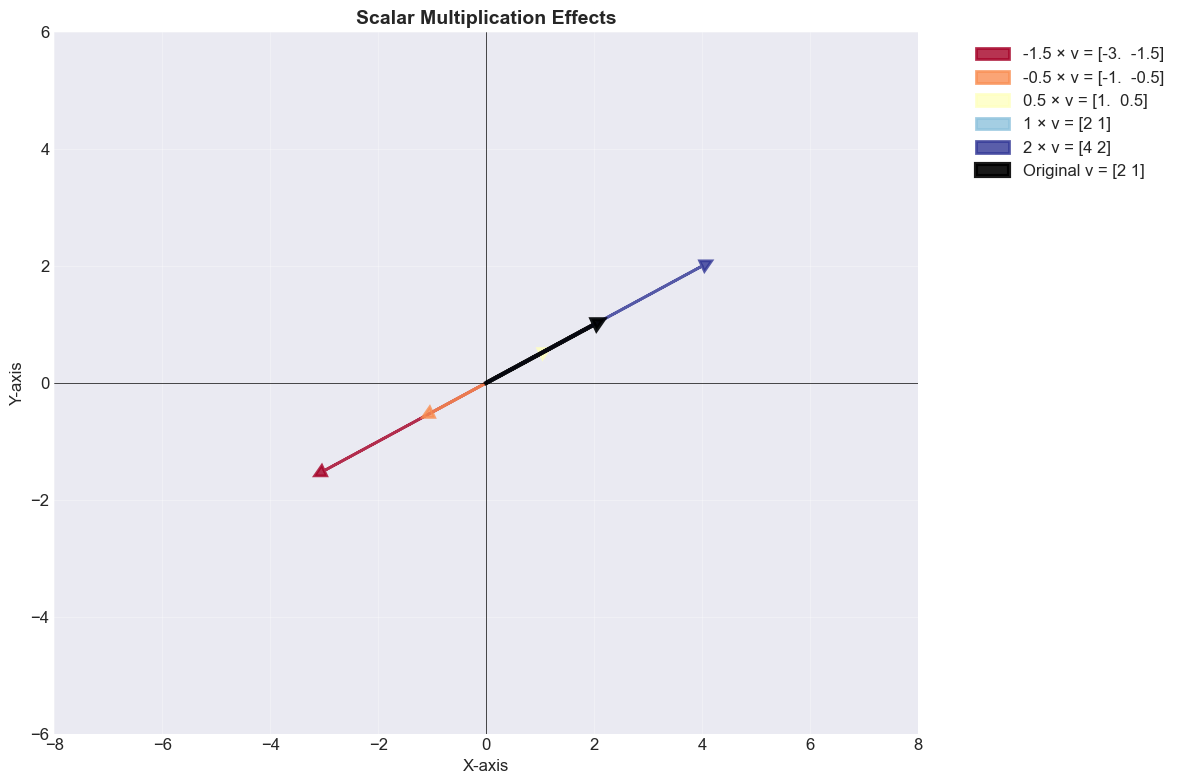

Scalar Multiplication Examples:
-1.5 × [2 1] = [-3.  -1.5], |magnitude| = 3.35
-0.5 × [2 1] = [-1.  -0.5], |magnitude| = 1.12
0.5 × [2 1] = [1.  0.5], |magnitude| = 1.12
1 × [2 1] = [2 1], |magnitude| = 2.24
2 × [2 1] = [4 2], |magnitude| = 4.47


In [17]:
def visualize_scalar_multiplication(vector, scalars):
    """
    Visualize the effect of scalar multiplication on a vector
    """
    fig, ax = plt.subplots(figsize=(12, 8))
    colors = plt.cm.RdYlBu(np.linspace(0, 1, len(scalars)))
    
    for i, (scalar, color) in enumerate(zip(scalars, colors)):
        scaled_vector = scalar * vector
        ax.arrow(0, 0, scaled_vector[0], scaled_vector[1], 
                head_width=0.2, head_length=0.2, 
                fc=color, ec=color, linewidth=2, 
                label=f'{scalar} × v = {scaled_vector}', alpha=0.8)
    
    # Original vector in black
    ax.arrow(0, 0, vector[0], vector[1], 
            head_width=0.2, head_length=0.2, 
            fc='black', ec='black', linewidth=3, 
            label=f'Original v = {vector}', alpha=0.9)
    
    ax.set_xlim(-8, 8)
    ax.set_ylim(-6, 6)
    ax.grid(True, alpha=0.3)
    ax.axhline(y=0, color='k', linewidth=0.5)
    ax.axvline(x=0, color='k', linewidth=0.5)
    ax.set_xlabel('X-axis', fontsize=12)
    ax.set_ylabel('Y-axis', fontsize=12)
    ax.set_title('Scalar Multiplication Effects', fontsize=14, weight='bold')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()

# Demonstrate scalar multiplication
test_vector = np.array([2, 1])
scalars = [-1.5, -0.5, 0.5, 1, 2]
visualize_scalar_multiplication(test_vector, scalars)
plt.show()

print("Scalar Multiplication Examples:")
for scalar in scalars:
    result = scalar * test_vector
    magnitude = np.linalg.norm(result)
    print(f"{scalar} × {test_vector} = {result}, |magnitude| = {magnitude:.2f}")

### 3. Dot Product (Inner Product)

The dot product is fundamental in AI and ML! It measures how "aligned" two vectors are:

$$\mathbf{a} \cdot \mathbf{b} = a_1 b_1 + a_2 b_2 = |\mathbf{a}| |\mathbf{b}| \cos(\theta)$$

Where $\theta$ is the angle between the vectors.

**Applications in AI:**
- Similarity measures
- Neural network computations
- Attention mechanisms

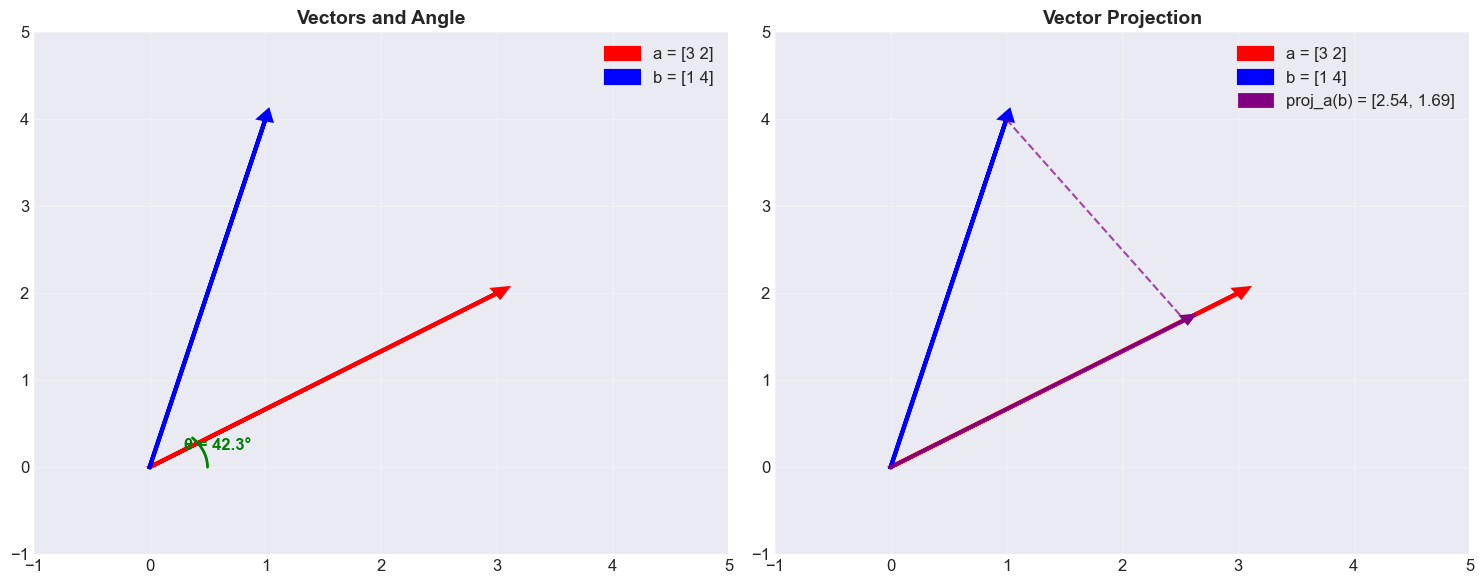

Dot Product Analysis:
a = [3 2], |a| = 3.61
b = [1 4], |b| = 4.12
a · b = 11.00
Angle between vectors: 42.27°
Projection of b onto a: [2.53846154 1.69230769]
Positive dot product → vectors point in similar directions


In [18]:
def visualize_dot_product(vec_a, vec_b):
    """
    Visualize dot product and the angle between vectors
    """
    # Calculate dot product and angle
    dot_product = np.dot(vec_a, vec_b)
    magnitude_a = np.linalg.norm(vec_a)
    magnitude_b = np.linalg.norm(vec_b)
    
    # Calculate angle (in radians and degrees)
    cos_theta = dot_product / (magnitude_a * magnitude_b)
    cos_theta = np.clip(cos_theta, -1, 1)  # Ensure valid range for arccos
    theta_rad = np.arccos(cos_theta)
    theta_deg = np.degrees(theta_rad)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot 1: Vectors and angle
    ax1.arrow(0, 0, vec_a[0], vec_a[1], head_width=0.1, head_length=0.1, 
             fc='red', ec='red', linewidth=3, label=f'a = {vec_a}')
    ax1.arrow(0, 0, vec_b[0], vec_b[1], head_width=0.1, head_length=0.1, 
             fc='blue', ec='blue', linewidth=3, label=f'b = {vec_b}')
    
    # Draw angle arc
    angle_range = np.linspace(0, theta_rad, 100)
    arc_radius = 0.5
    arc_x = arc_radius * np.cos(angle_range)
    arc_y = arc_radius * np.sin(angle_range)
    ax1.plot(arc_x, arc_y, 'green', linewidth=2)
    ax1.text(0.3, 0.2, f'θ = {theta_deg:.1f}°', fontsize=12, color='green', weight='bold')
    
    ax1.set_xlim(-1, 5)
    ax1.set_ylim(-1, 5)
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    ax1.set_title('Vectors and Angle', fontsize=14, weight='bold')
    
    # Plot 2: Projection visualization
    projection_length = dot_product / magnitude_a
    projection_vector = projection_length * (vec_a / magnitude_a)
    
    ax2.arrow(0, 0, vec_a[0], vec_a[1], head_width=0.1, head_length=0.1, 
             fc='red', ec='red', linewidth=3, label=f'a = {vec_a}')
    ax2.arrow(0, 0, vec_b[0], vec_b[1], head_width=0.1, head_length=0.1, 
             fc='blue', ec='blue', linewidth=3, label=f'b = {vec_b}')
    ax2.arrow(0, 0, projection_vector[0], projection_vector[1], 
             head_width=0.1, head_length=0.1, 
             fc='purple', ec='purple', linewidth=2, 
             label=f'proj_a(b) = [{projection_vector[0]:.2f}, {projection_vector[1]:.2f}]')
    
    # Draw projection line
    ax2.plot([vec_b[0], projection_vector[0]], [vec_b[1], projection_vector[1]], 
            'purple', linestyle='--', alpha=0.7)
    
    ax2.set_xlim(-1, 5)
    ax2.set_ylim(-1, 5)
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    ax2.set_title('Vector Projection', fontsize=14, weight='bold')
    
    plt.tight_layout()
    
    return dot_product, theta_deg, projection_vector

# Demonstrate dot product
dot_prod, angle, proj = visualize_dot_product(vector_a, vector_b)
plt.show()

print("Dot Product Analysis:")
print(f"a = {vector_a}, |a| = {np.linalg.norm(vector_a):.2f}")
print(f"b = {vector_b}, |b| = {np.linalg.norm(vector_b):.2f}")
print(f"a · b = {dot_prod:.2f}")
print(f"Angle between vectors: {angle:.2f}°")
print(f"Projection of b onto a: {proj}")

# Interpretation
if dot_prod > 0:
    print("Positive dot product → vectors point in similar directions")
elif dot_prod < 0:
    print("Negative dot product → vectors point in opposite directions")
else:
    print("Zero dot product → vectors are perpendicular")

### Interactive Vector Playground

Let's create an interactive widget to explore vector operations!

In [19]:
def interactive_vector_operations(a1=3, a2=2, b1=1, b2=4):
    """
    Interactive visualization of vector operations
    """
    vec_a = np.array([a1, a2])
    vec_b = np.array([b1, b2])
    
    # Calculate operations
    vec_sum = vec_a + vec_b
    vec_diff = vec_a - vec_b
    dot_product = np.dot(vec_a, vec_b)
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    
    # Plot 1: Original vectors
    ax1.arrow(0, 0, vec_a[0], vec_a[1], head_width=0.2, head_length=0.2, 
             fc='red', ec='red', linewidth=2, label=f'a = [{a1}, {a2}]')
    ax1.arrow(0, 0, vec_b[0], vec_b[1], head_width=0.2, head_length=0.2, 
             fc='blue', ec='blue', linewidth=2, label=f'b = [{b1}, {b2}]')
    ax1.set_xlim(-6, 6)
    ax1.set_ylim(-6, 6)
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    ax1.set_title('Original Vectors')
    
    # Plot 2: Vector addition
    ax2.arrow(0, 0, vec_a[0], vec_a[1], head_width=0.2, head_length=0.2, 
             fc='red', ec='red', linewidth=2, alpha=0.7)
    ax2.arrow(0, 0, vec_b[0], vec_b[1], head_width=0.2, head_length=0.2, 
             fc='blue', ec='blue', linewidth=2, alpha=0.7)
    ax2.arrow(0, 0, vec_sum[0], vec_sum[1], head_width=0.3, head_length=0.3, 
             fc='green', ec='green', linewidth=3, label=f'a + b = {vec_sum}')
    ax2.set_xlim(-6, 8)
    ax2.set_ylim(-6, 8)
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    ax2.set_title('Vector Addition')
    
    # Plot 3: Vector subtraction
    ax3.arrow(0, 0, vec_a[0], vec_a[1], head_width=0.2, head_length=0.2, 
             fc='red', ec='red', linewidth=2, alpha=0.7)
    ax3.arrow(0, 0, vec_b[0], vec_b[1], head_width=0.2, head_length=0.2, 
             fc='blue', ec='blue', linewidth=2, alpha=0.7)
    ax3.arrow(0, 0, vec_diff[0], vec_diff[1], head_width=0.3, head_length=0.3, 
             fc='orange', ec='orange', linewidth=3, label=f'a - b = {vec_diff}')
    ax3.set_xlim(-6, 6)
    ax3.set_ylim(-6, 6)
    ax3.grid(True, alpha=0.3)
    ax3.legend()
    ax3.set_title('Vector Subtraction')
    
    # Plot 4: Dot product visualization
    magnitude_a = np.linalg.norm(vec_a)
    magnitude_b = np.linalg.norm(vec_b)
    if magnitude_a > 0 and magnitude_b > 0:
        cos_theta = dot_product / (magnitude_a * magnitude_b)
        cos_theta = np.clip(cos_theta, -1, 1)
        theta = np.degrees(np.arccos(cos_theta))
    else:
        theta = 0
    
    ax4.arrow(0, 0, vec_a[0], vec_a[1], head_width=0.2, head_length=0.2, 
             fc='red', ec='red', linewidth=2)
    ax4.arrow(0, 0, vec_b[0], vec_b[1], head_width=0.2, head_length=0.2, 
             fc='blue', ec='blue', linewidth=2)
    ax4.text(0.5, -5, f'a · b = {dot_product:.2f}\nAngle = {theta:.1f}°', 
            fontsize=12, bbox=dict(boxstyle="round", facecolor='wheat', alpha=0.8))
    ax4.set_xlim(-6, 6)
    ax4.set_ylim(-6, 6)
    ax4.grid(True, alpha=0.3)
    ax4.set_title('Dot Product')
    
    plt.tight_layout()
    plt.show()

# Create interactive widget
print("Interactive Vector Explorer:")
print("Adjust the sliders to see how vector operations change!")

interact(interactive_vector_operations,
         a1=widgets.FloatSlider(value=3, min=-5, max=5, step=0.1, description='a₁:'),
         a2=widgets.FloatSlider(value=2, min=-5, max=5, step=0.1, description='a₂:'),
         b1=widgets.FloatSlider(value=1, min=-5, max=5, step=0.1, description='b₁:'),
         b2=widgets.FloatSlider(value=4, min=-5, max=5, step=0.1, description='b₂:'));

Interactive Vector Explorer:
Adjust the sliders to see how vector operations change!


interactive(children=(FloatSlider(value=3.0, description='a₁:', max=5.0, min=-5.0), FloatSlider(value=2.0, des…

---

# Chapter 2: Understanding Matrices

## What is a Matrix?

A **matrix** is a rectangular array of numbers arranged in rows and columns. In AI, matrices are everywhere:

- **Data storage** (each row = sample, each column = feature)
- **Linear transformations** (rotations, scaling, projections)
- **Neural network weights** (connecting layers)

### Mathematical Definition

An $m \times n$ matrix $\mathbf{A}$ has $m$ rows and $n$ columns:

$$\mathbf{A} = \begin{bmatrix} 
a_{11} & a_{12} & \cdots & a_{1n} \\
a_{21} & a_{22} & \cdots & a_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{m1} & a_{m2} & \cdots & a_{mn}
\end{bmatrix}$$

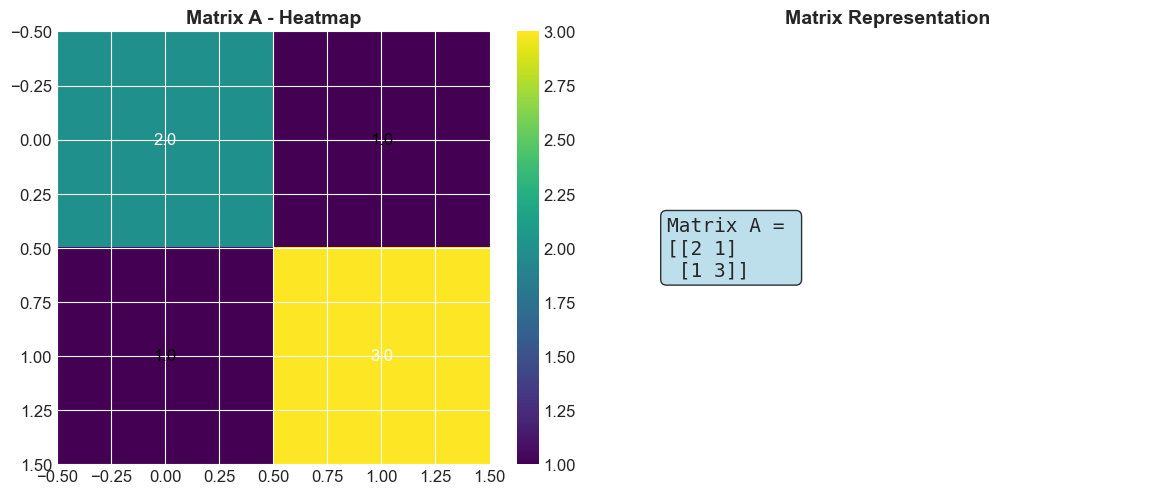

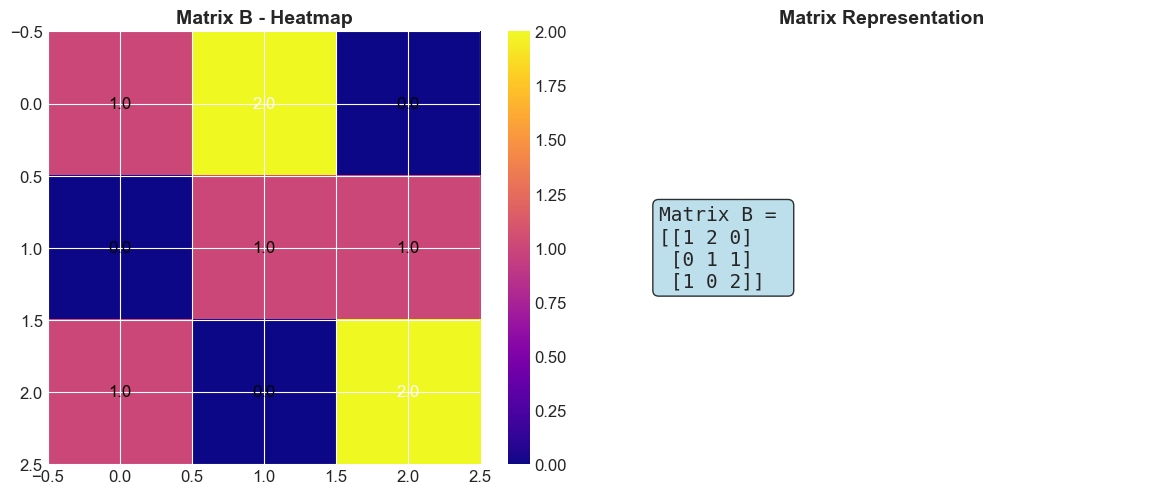

Matrix Properties:
Matrix A shape: (2, 2) (2×2)
Matrix B shape: (3, 3) (3×3)
Matrix A determinant: 5.00
Matrix B determinant: 4.00


In [20]:
# Create example matrices
matrix_A = np.array([[2, 1], 
                     [1, 3]])

matrix_B = np.array([[1, 2, 0], 
                     [0, 1, 1],
                     [1, 0, 2]])

def visualize_matrix(matrix, title, cmap='viridis'):
    """
    Visualize a matrix as a heatmap
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Heatmap visualization
    im = ax1.imshow(matrix, cmap=cmap, aspect='equal')
    ax1.set_title(f'{title} - Heatmap', fontsize=14, weight='bold')
    
    # Add value annotations
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            ax1.text(j, i, f'{matrix[i, j]:.1f}', 
                    ha='center', va='center', fontsize=12, 
                    color='white' if matrix[i, j] > matrix.max()/2 else 'black')
    
    plt.colorbar(im, ax=ax1)
    
    # Text representation
    ax2.text(0.1, 0.5, f'{title} = \n{matrix}', 
            fontsize=14, fontfamily='monospace',
            verticalalignment='center',
            bbox=dict(boxstyle="round", facecolor='lightblue', alpha=0.8))
    ax2.set_xlim(0, 1)
    ax2.set_ylim(0, 1)
    ax2.axis('off')
    ax2.set_title('Matrix Representation', fontsize=14, weight='bold')
    
    plt.tight_layout()

# Visualize our matrices
visualize_matrix(matrix_A, 'Matrix A')
plt.show()

visualize_matrix(matrix_B, 'Matrix B', cmap='plasma')
plt.show()

print(f"Matrix Properties:")
print(f"Matrix A shape: {matrix_A.shape} ({matrix_A.shape[0]}×{matrix_A.shape[1]})")
print(f"Matrix B shape: {matrix_B.shape} ({matrix_B.shape[0]}×{matrix_B.shape[1]})")
print(f"Matrix A determinant: {np.linalg.det(matrix_A):.2f}")
print(f"Matrix B determinant: {np.linalg.det(matrix_B):.2f}")

## Matrices as Linear Transformations

The most powerful way to think about matrices is as **functions** that transform vectors! 

When we multiply a matrix $\mathbf{A}$ by a vector $\mathbf{v}$, we get:
$$\mathbf{A}\mathbf{v} = \text{transformed vector}$$

Let's see some common transformations:

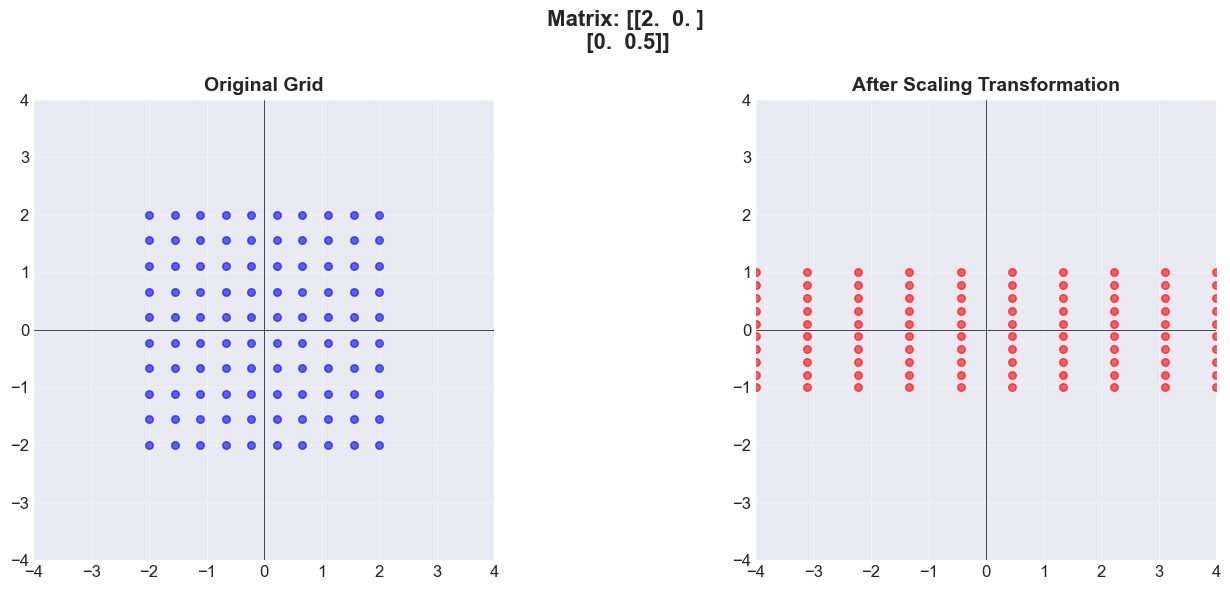


Scaling Matrix:
[[2.  0. ]
 [0.  0.5]]
Determinant: 1.00
----------------------------------------


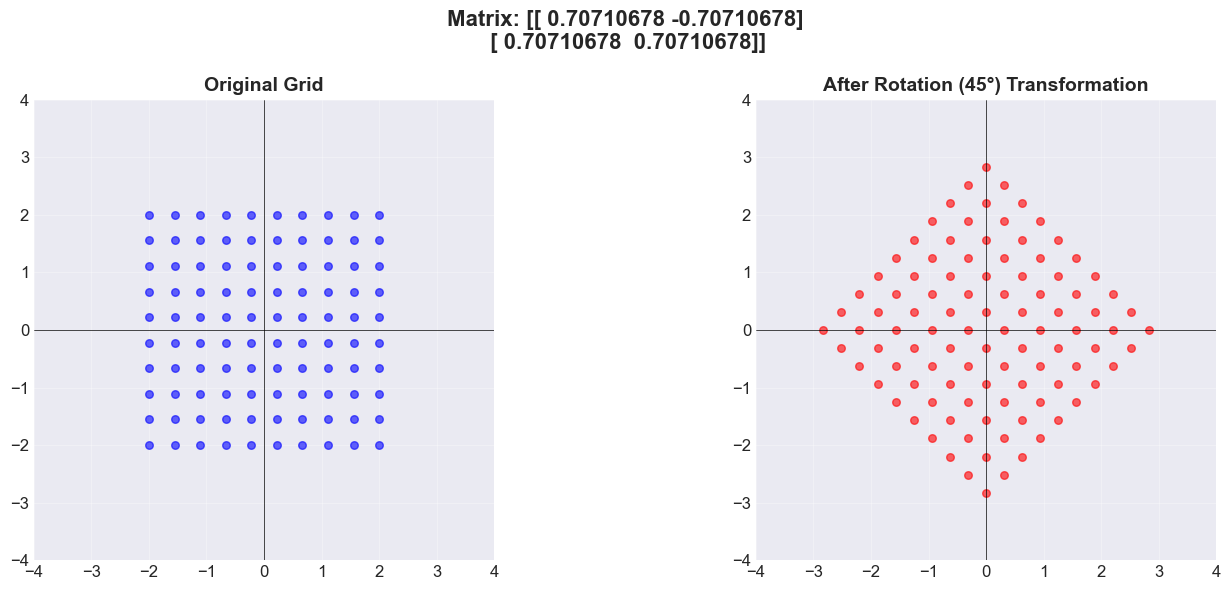


Rotation (45°) Matrix:
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
Determinant: 1.00
----------------------------------------


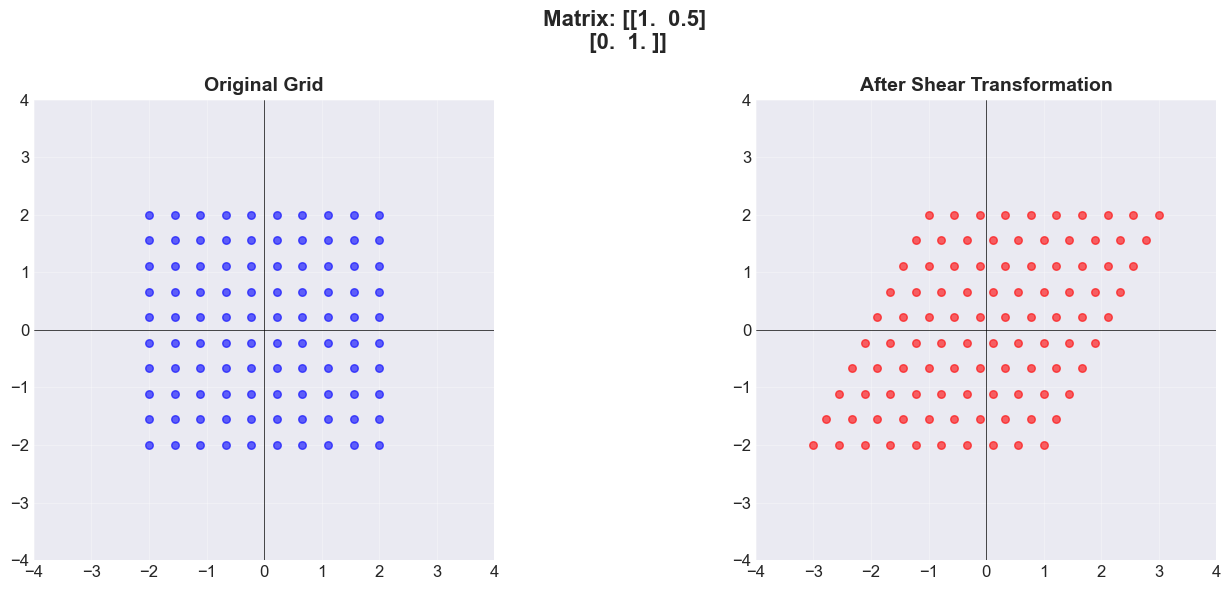


Shear Matrix:
[[1.  0.5]
 [0.  1. ]]
Determinant: 1.00
----------------------------------------


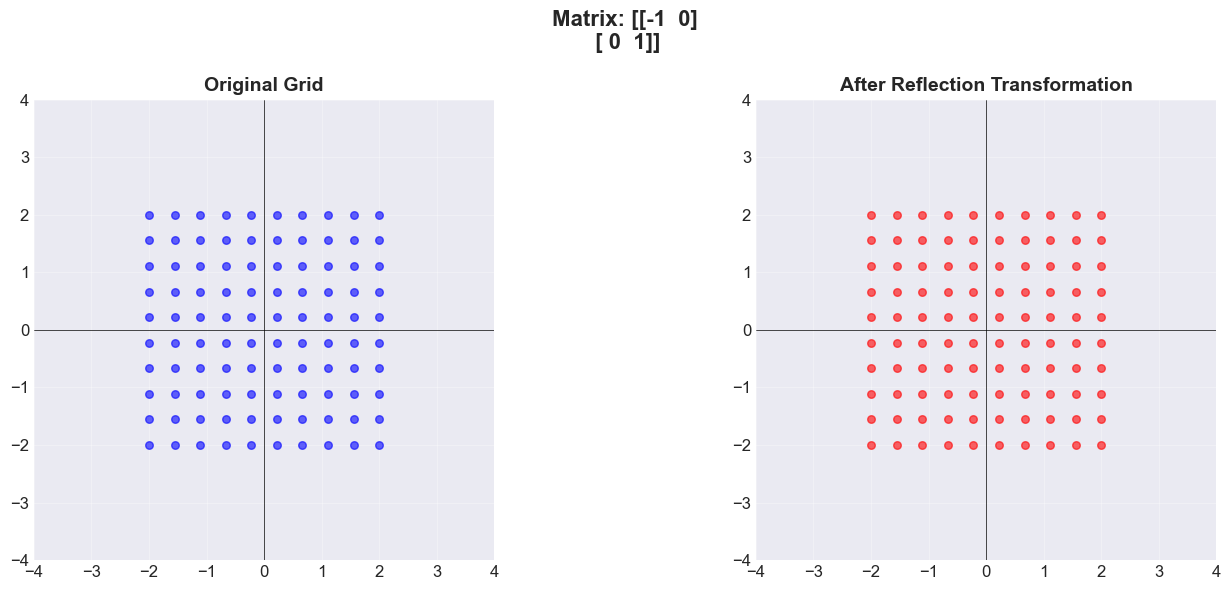


Reflection Matrix:
[[-1  0]
 [ 0  1]]
Determinant: -1.00
----------------------------------------


In [21]:
def visualize_transformation(matrix, title, grid_points=10):
    """
    Visualize how a matrix transforms a grid of points
    """
    # Create a grid of points
    x = np.linspace(-2, 2, grid_points)
    y = np.linspace(-2, 2, grid_points)
    X, Y = np.meshgrid(x, y)
    
    # Original points
    original_points = np.array([X.flatten(), Y.flatten()])
    
    # Transform points
    transformed_points = matrix @ original_points
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot original grid
    ax1.scatter(original_points[0], original_points[1], 
               c='blue', alpha=0.6, s=30)
    ax1.set_xlim(-4, 4)
    ax1.set_ylim(-4, 4)
    ax1.grid(True, alpha=0.3)
    ax1.set_aspect('equal')
    ax1.set_title('Original Grid', fontsize=14, weight='bold')
    ax1.axhline(y=0, color='k', linewidth=0.5)
    ax1.axvline(x=0, color='k', linewidth=0.5)
    
    # Plot transformed grid
    ax2.scatter(transformed_points[0], transformed_points[1], 
               c='red', alpha=0.6, s=30)
    ax2.set_xlim(-4, 4)
    ax2.set_ylim(-4, 4)
    ax2.grid(True, alpha=0.3)
    ax2.set_aspect('equal')
    ax2.set_title(f'After {title} Transformation', fontsize=14, weight='bold')
    ax2.axhline(y=0, color='k', linewidth=0.5)
    ax2.axvline(x=0, color='k', linewidth=0.5)
    
    plt.suptitle(f'Matrix: {matrix}', fontsize=16, weight='bold')
    plt.tight_layout()

# Common transformation matrices
transformations = {
    'Scaling': np.array([[2, 0], [0, 0.5]]),
    'Rotation (45°)': np.array([[np.cos(np.pi/4), -np.sin(np.pi/4)], 
                               [np.sin(np.pi/4), np.cos(np.pi/4)]]),
    'Shear': np.array([[1, 0.5], [0, 1]]),
    'Reflection': np.array([[-1, 0], [0, 1]])
}

# Visualize each transformation
for name, matrix in transformations.items():
    visualize_transformation(matrix, name)
    plt.show()
    print(f"\n{name} Matrix:")
    print(matrix)
    print(f"Determinant: {np.linalg.det(matrix):.2f}")
    print("-" * 40)

## Connection to Neural Networks

In neural networks, matrices represent **weights** that transform input data:

$$\mathbf{output} = \mathbf{W} \cdot \mathbf{input} + \mathbf{b}$$

Where:
- $\mathbf{W}$ is the weight matrix
- $\mathbf{b}$ is the bias vector

Let's simulate a simple neural network layer:

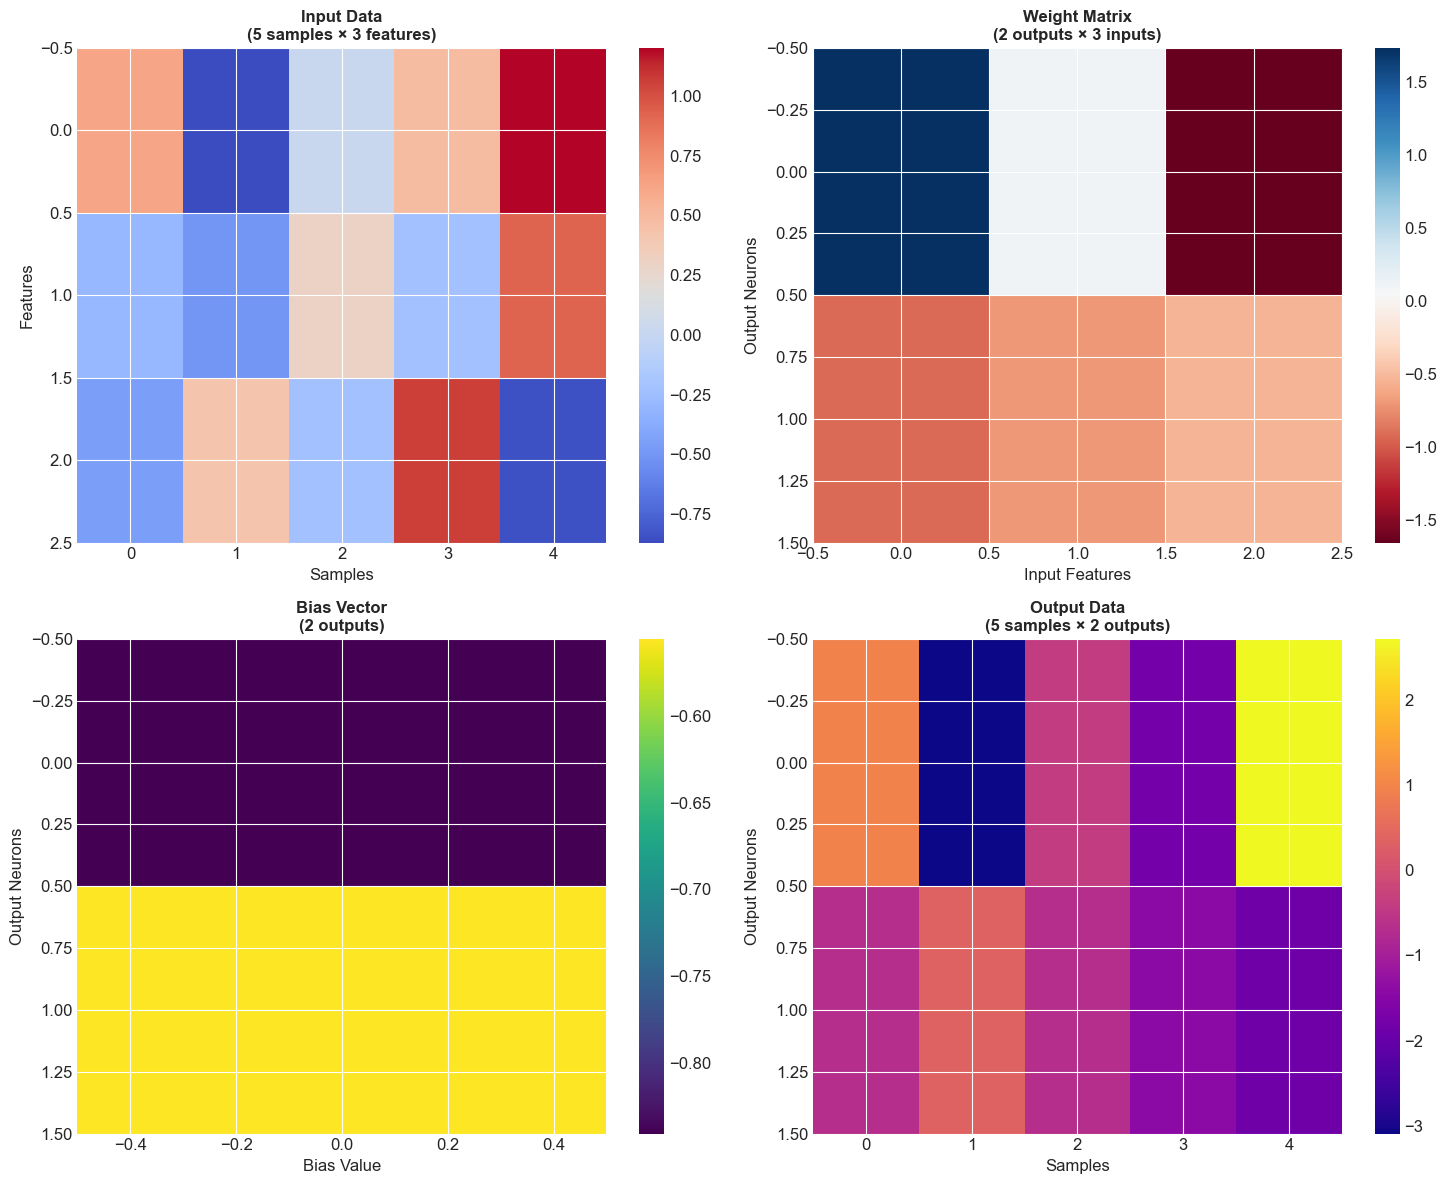

Neural Network Layer Simulation:
Input shape: (5, 3)
Weight matrix shape: (2, 3)
Bias vector shape: (2,)
Output shape: (5, 2)

Transformation: (5, 3) → (5, 2)

Mathematical Operation:
output = weight_matrix @ input + bias
(2, 5) = (2, 3) @ (3, 5) + (2, 1)


In [22]:
def simulate_neural_layer(input_size=3, output_size=2, num_samples=5):
    """
    Simulate a neural network layer transformation
    """
    # Generate random input data (num_samples × input_size)
    inputs = np.random.randn(num_samples, input_size)
    
    # Generate random weights and biases
    weights = np.random.randn(output_size, input_size)
    biases = np.random.randn(output_size, 1)
    
    # Forward pass: output = W @ input + b
    outputs = weights @ inputs.T + biases
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    
    # Visualize inputs
    im1 = ax1.imshow(inputs.T, cmap='coolwarm', aspect='auto')
    ax1.set_title(f'Input Data\n({num_samples} samples × {input_size} features)', fontsize=12, weight='bold')
    ax1.set_ylabel('Features')
    ax1.set_xlabel('Samples')
    plt.colorbar(im1, ax=ax1)
    
    # Visualize weights
    im2 = ax2.imshow(weights, cmap='RdBu', aspect='auto')
    ax2.set_title(f'Weight Matrix\n({output_size} outputs × {input_size} inputs)', fontsize=12, weight='bold')
    ax2.set_ylabel('Output Neurons')
    ax2.set_xlabel('Input Features')
    plt.colorbar(im2, ax=ax2)
    
    # Visualize biases
    im3 = ax3.imshow(biases, cmap='viridis', aspect='auto')
    ax3.set_title(f'Bias Vector\n({output_size} outputs)', fontsize=12, weight='bold')
    ax3.set_ylabel('Output Neurons')
    ax3.set_xlabel('Bias Value')
    plt.colorbar(im3, ax=ax3)
    
    # Visualize outputs
    im4 = ax4.imshow(outputs, cmap='plasma', aspect='auto')
    ax4.set_title(f'Output Data\n({num_samples} samples × {output_size} outputs)', fontsize=12, weight='bold')
    ax4.set_ylabel('Output Neurons')
    ax4.set_xlabel('Samples')
    plt.colorbar(im4, ax=ax4)
    
    plt.tight_layout()
    
    return inputs, weights, biases, outputs.T

# Simulate a neural network layer
inputs, weights, biases, outputs = simulate_neural_layer()
plt.show()

print("Neural Network Layer Simulation:")
print(f"Input shape: {inputs.shape}")
print(f"Weight matrix shape: {weights.shape}")
print(f"Bias vector shape: {biases.flatten().shape}")
print(f"Output shape: {outputs.shape}")
print(f"\nTransformation: {inputs.shape} → {outputs.shape}")

# Show the mathematical operation
print("\nMathematical Operation:")
print("output = weight_matrix @ input + bias")
print(f"({outputs.shape[1]}, {outputs.shape[0]}) = ({weights.shape[0]}, {weights.shape[1]}) @ ({inputs.shape[1]}, {inputs.shape[0]}) + ({biases.shape[0]}, 1)")

## Special Matrices in AI

Certain matrices have special properties that make them important in AI:

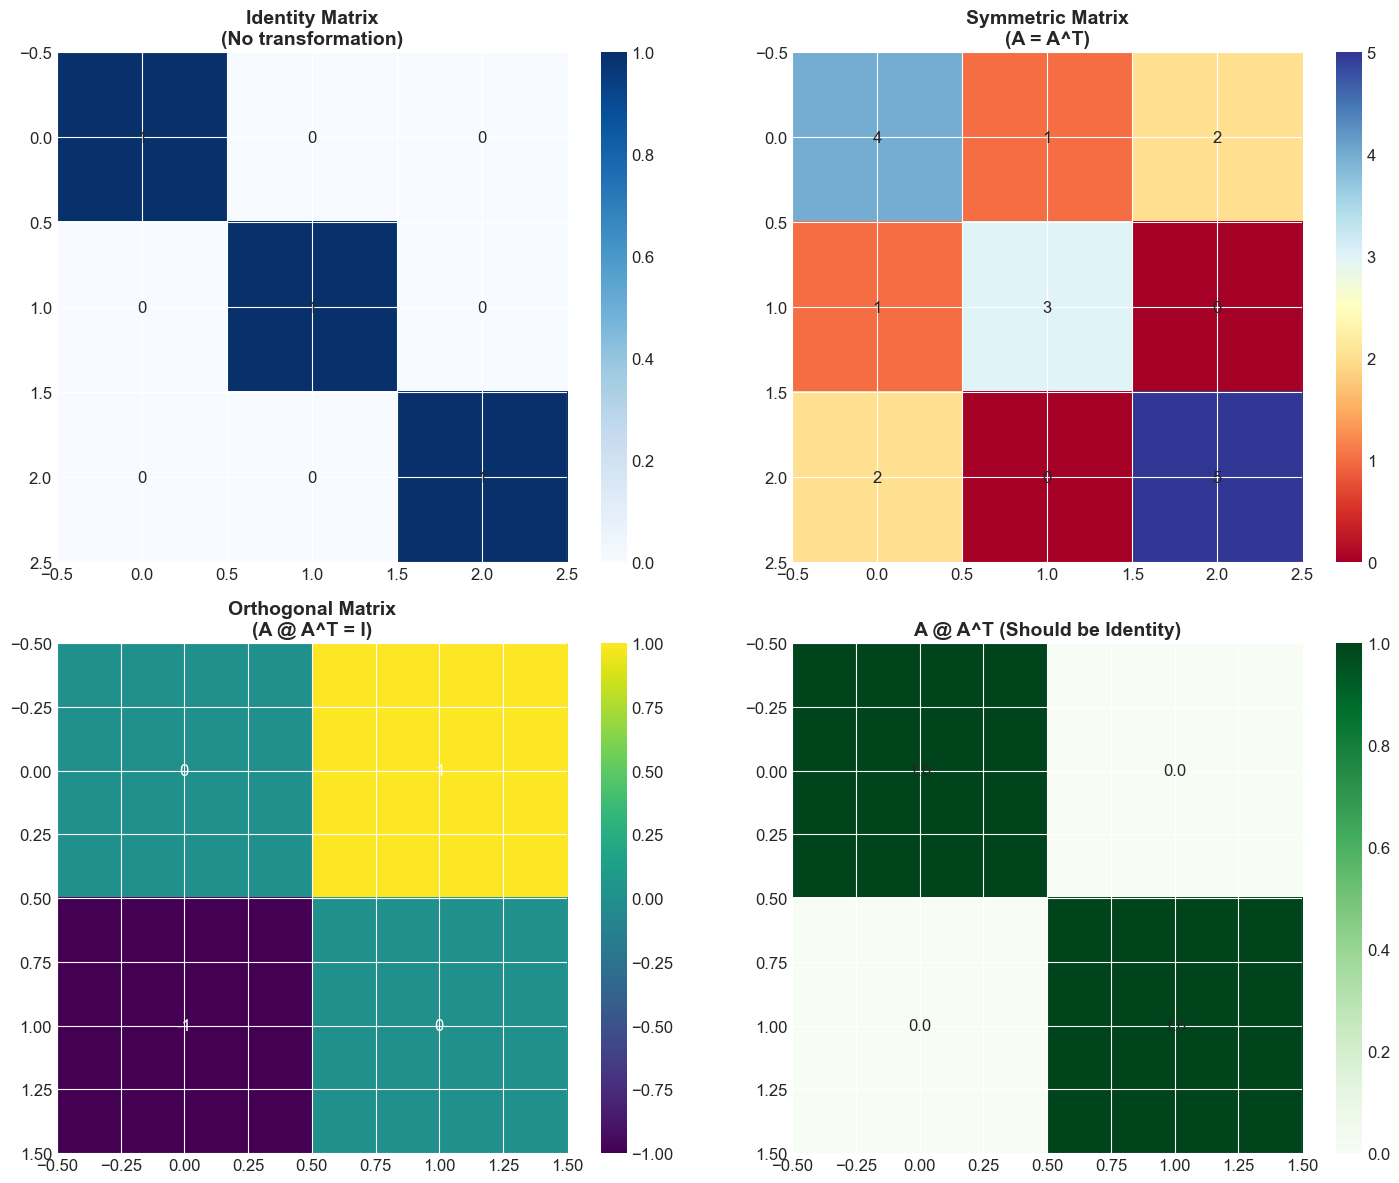

Special Matrix Properties:

1. Identity Matrix (I):
   - Multiplying by I leaves vectors unchanged
   - I @ v = v for any vector v

2. Symmetric Matrix:
   - A = A^T (equals its transpose)
   - Important in optimization and PCA
   - Check: A[i,j] = A[j,i]

3. Orthogonal Matrix:
   - Preserves lengths and angles
   - A @ A^T = I
   - Represents rotations and reflections
   - Verification: ||orthogonal_check - I|| = 0.000000


In [23]:
# Special matrices
identity = np.eye(3)
symmetric = np.array([[4, 1, 2], [1, 3, 0], [2, 0, 5]])
orthogonal = np.array([[0, 1], [-1, 0]])  # 90-degree rotation

# Verify orthogonal property: A @ A.T = I
orthogonal_check = orthogonal @ orthogonal.T

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Identity matrix
im1 = ax1.imshow(identity, cmap='Blues')
ax1.set_title('Identity Matrix\n(No transformation)', fontsize=14, weight='bold')
for i in range(3):
    for j in range(3):
        ax1.text(j, i, f'{identity[i,j]:.0f}', ha='center', va='center', fontsize=12)
plt.colorbar(im1, ax=ax1)

# Symmetric matrix
im2 = ax2.imshow(symmetric, cmap='RdYlBu')
ax2.set_title('Symmetric Matrix\n(A = A^T)', fontsize=14, weight='bold')
for i in range(3):
    for j in range(3):
        ax2.text(j, i, f'{symmetric[i,j]:.0f}', ha='center', va='center', fontsize=12)
plt.colorbar(im2, ax=ax2)

# Orthogonal matrix
im3 = ax3.imshow(orthogonal, cmap='viridis')
ax3.set_title('Orthogonal Matrix\n(A @ A^T = I)', fontsize=14, weight='bold')
for i in range(2):
    for j in range(2):
        ax3.text(j, i, f'{orthogonal[i,j]:.0f}', ha='center', va='center', 
               fontsize=12, color='white')
plt.colorbar(im3, ax=ax3)

# Orthogonal verification
im4 = ax4.imshow(orthogonal_check, cmap='Greens')
ax4.set_title('A @ A^T (Should be Identity)', fontsize=14, weight='bold')
for i in range(2):
    for j in range(2):
        ax4.text(j, i, f'{orthogonal_check[i,j]:.1f}', ha='center', va='center', fontsize=12)
plt.colorbar(im4, ax=ax4)

plt.tight_layout()
plt.show()

print("Special Matrix Properties:")
print(f"\n1. Identity Matrix (I):")
print(f"   - Multiplying by I leaves vectors unchanged")
print(f"   - I @ v = v for any vector v")

print(f"\n2. Symmetric Matrix:")
print(f"   - A = A^T (equals its transpose)")
print(f"   - Important in optimization and PCA")
print(f"   - Check: A[i,j] = A[j,i]")

print(f"\n3. Orthogonal Matrix:")
print(f"   - Preserves lengths and angles")
print(f"   - A @ A^T = I")
print(f"   - Represents rotations and reflections")
print(f"   - Verification: ||orthogonal_check - I|| = {np.linalg.norm(orthogonal_check - np.eye(2)):.6f}")

---

# Key Takeaways

## Vectors
- **Geometric objects** with magnitude and direction
- **Building blocks** of data representation in AI
- **Operations**: Addition, scalar multiplication, dot product
- **Applications**: Feature vectors, embeddings, gradients

## Matrices
- **Linear transformations** that change vectors
- **Neural network weights** connecting layers
- **Data containers** (rows = samples, columns = features)
- **Special types**: Identity, symmetric, orthogonal

## AI Connections
- **Neural networks**: Matrix multiplications transform data
- **Computer vision**: Images as matrices of pixel values
- **NLP**: Word embeddings as high-dimensional vectors
- **Optimization**: Gradients as vectors pointing toward solutions
